In [145]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [146]:
# Read the CSV file with specified encoding
df = pd.read_csv('../data/hotels_list.csv', encoding='ISO-8859-1')
df.head()

,hotel,price,score,reviews_count,review_text,free_cancellation
0,Hotel & Restaurante PeÃ±a,332,9,1856,Wonderful,Free Cancellation
1,Almunia de San Miguel,368,8.8,847,Excellent,No Free Cancellation
2,Hotel Vistamar Wellness by DLV,316,8.9,1141,Excellent,No Free Cancellation
3,Hostal Prada,477,8.7,966,Excellent,No Free Cancellation
4,La Portuguesa Apartments,374,8.8,636,Excellent,No Free Cancellation


In [147]:
# Show dataset info
print("Dataset information:")
print(df.info())

Dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 967 entries, 0 to 966
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   hotel              967 non-null    object
 1   price              967 non-null    object
 2   score              967 non-null    object
 3   reviews_count      967 non-null    object
 4   review_text        967 non-null    object
 5   free_cancellation  967 non-null    object
dtypes: object(6)
memory usage: 45.5+ KB
None


In [148]:
# Display missing values in each column
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
hotel                0
price                0
score                0
reviews_count        0
review_text          0
free_cancellation    0
dtype: int64


In [149]:
# Drop rows where score is 'No Score'
df = df[df['score'] != 'No Score']
print("Shape after dropping 'No Score' rows:", df.shape)

Shape after dropping 'No Score' rows: (949, 6)


In [150]:
# Encode free_cancellation column
df['free_cancellation'] = df['free_cancellation'].map({
    'Free Cancellation': 1,
    'No Free Cancellation': 0
})

df.head(20)

,hotel,price,score,reviews_count,review_text,free_cancellation
0,Hotel & Restaurante PeÃ±a,332,9,1856,Wonderful,1
1,Almunia de San Miguel,368,8.8,847,Excellent,0
2,Hotel Vistamar Wellness by DLV,316,8.9,1141,Excellent,0
3,Hostal Prada,477,8.7,966,Excellent,0
4,La Portuguesa Apartments,374,8.8,636,Excellent,0
5,Apartamentos Isla Encantada,280,9,537,Wonderful,0
6,Apartamentos Els Romers BenicarlÃ³-PeÃ±Ã­scola,288,8.6,420,Excellent,0
7,Apartamento Zoco CÃ³rdoba,291,9.2,68,Wonderful,0
8,Aire Turismo Rural,230,9.4,540,Wonderful,1
9,Bhost - Palacete del Ãguila,169,8.6,1867,Excellent,0


In [151]:
# Encode review_text column
df['review_text'] = df['review_text'].map({
    'Good': 0,
    'Very Good': 1,
    'Wonderful': 2,
    'Exceptional': 3,
    'Excellent': 4
})

df.head(20)

,hotel,price,score,reviews_count,review_text,free_cancellation
0,Hotel & Restaurante PeÃ±a,332,9,1856,2,1
1,Almunia de San Miguel,368,8.8,847,4,0
2,Hotel Vistamar Wellness by DLV,316,8.9,1141,4,0
3,Hostal Prada,477,8.7,966,4,0
4,La Portuguesa Apartments,374,8.8,636,4,0
5,Apartamentos Isla Encantada,280,9,537,2,0
6,Apartamentos Els Romers BenicarlÃ³-PeÃ±Ã­scola,288,8.6,420,4,0
7,Apartamento Zoco CÃ³rdoba,291,9.2,68,2,0
8,Aire Turismo Rural,230,9.4,540,2,1
9,Bhost - Palacete del Ãguila,169,8.6,1867,4,0


In [152]:
# Display data types of each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
hotel                object
price                object
score                object
reviews_count        object
review_text           int64
free_cancellation     int64
dtype: object


In [153]:
# Remove leading and trailing spaces and commas from price column
df['price'] = df['price'].str.strip().str.replace(',', '')

# Convert price and reviews_count to numeric types
df['price'] = df['price'].astype(int)
df['reviews_count'] = df['reviews_count'].astype(int)

# Convert score to float
df['score'] = df['score'].astype(float)

# Display data types of each column
print("Data types of each column:")
print(df.dtypes)

Data types of each column:
hotel                 object
price                  int64
score                float64
reviews_count          int64
review_text            int64
free_cancellation      int64
dtype: object


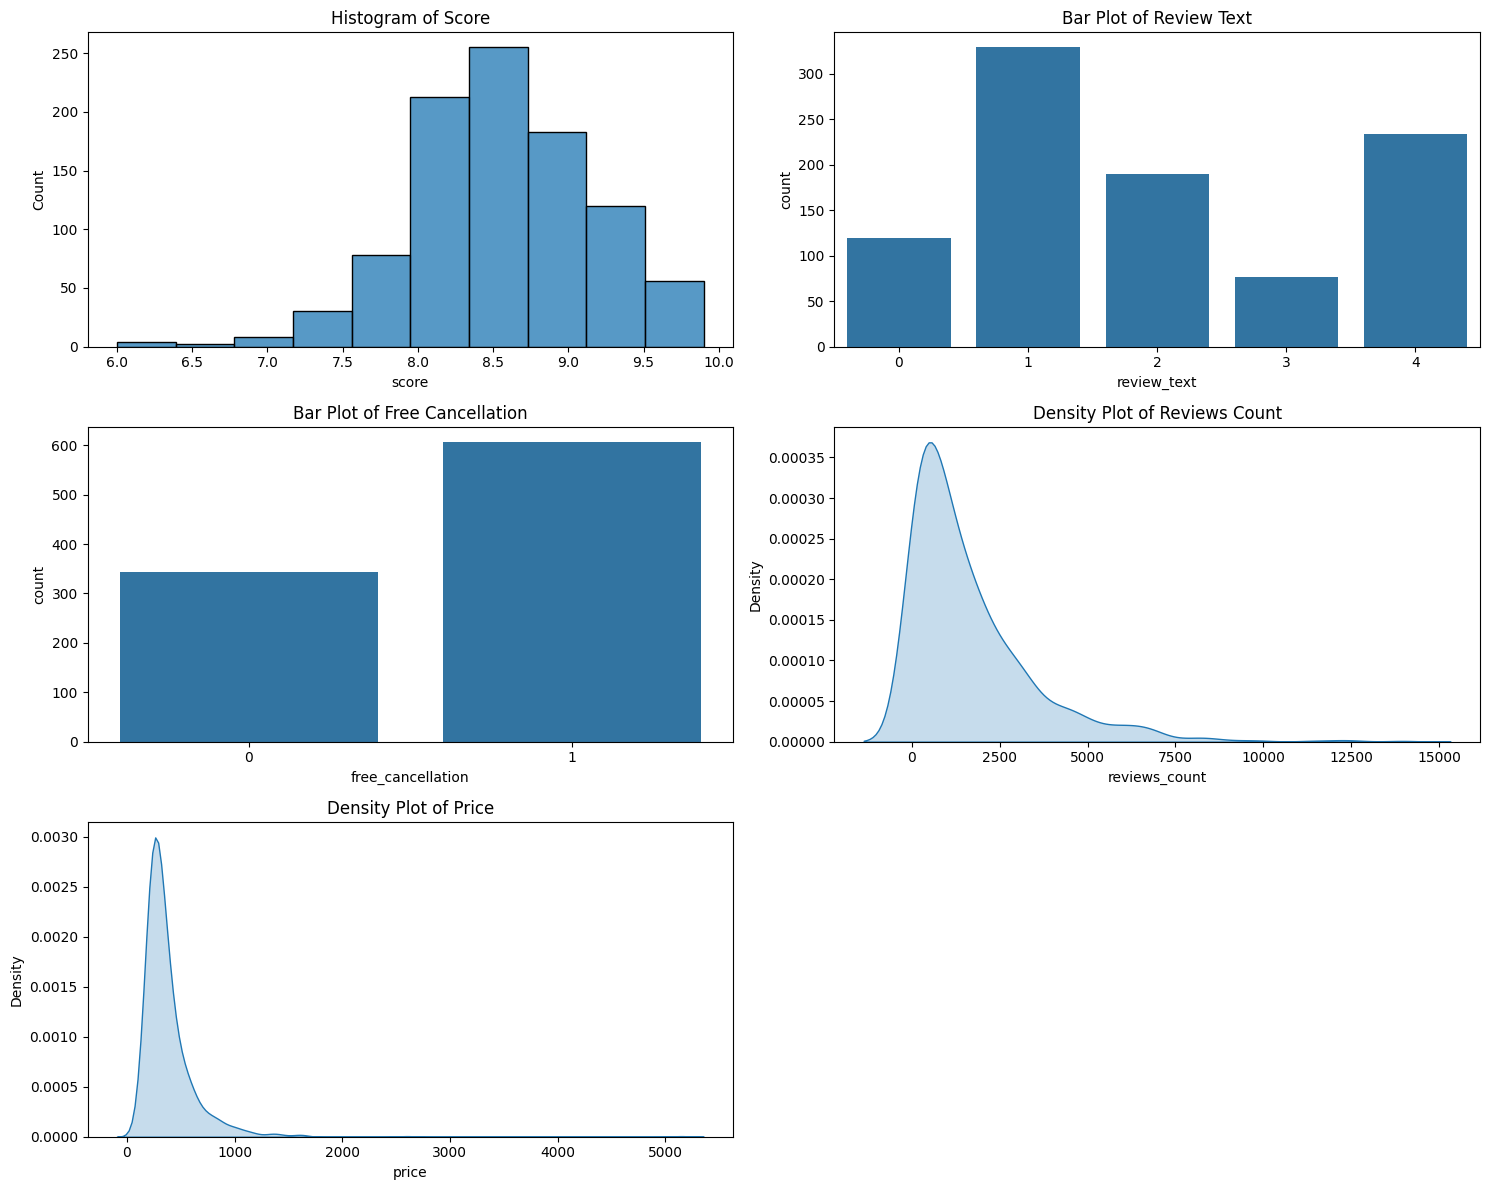

In [154]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the plots
plt.figure(figsize=(15, 12))

# Histogram plot for score column
plt.subplot(3, 2, 1)
sns.histplot(df['score'], bins=10, kde=False)
plt.title('Histogram of Score')

# Bar plot for review_text column
plt.subplot(3, 2, 2)
sns.countplot(data=df, x='review_text')
plt.title('Bar Plot of Review Text')
plt.xticks(rotation=0)

# Bar plot for free_cancellation column
plt.subplot(3, 2, 3)
sns.countplot(data=df, x='free_cancellation')
plt.title('Bar Plot of Free Cancellation')
plt.xticks(rotation=0)

# Density plot for reviews_count column
plt.subplot(3, 2, 4)
sns.kdeplot(df['reviews_count'], fill=True)
plt.title('Density Plot of Reviews Count')

# Density plot for price column
plt.subplot(3, 2, 5)
sns.kdeplot(df['price'], fill=True)
plt.title('Density Plot of Price')

plt.tight_layout()
plt.show()

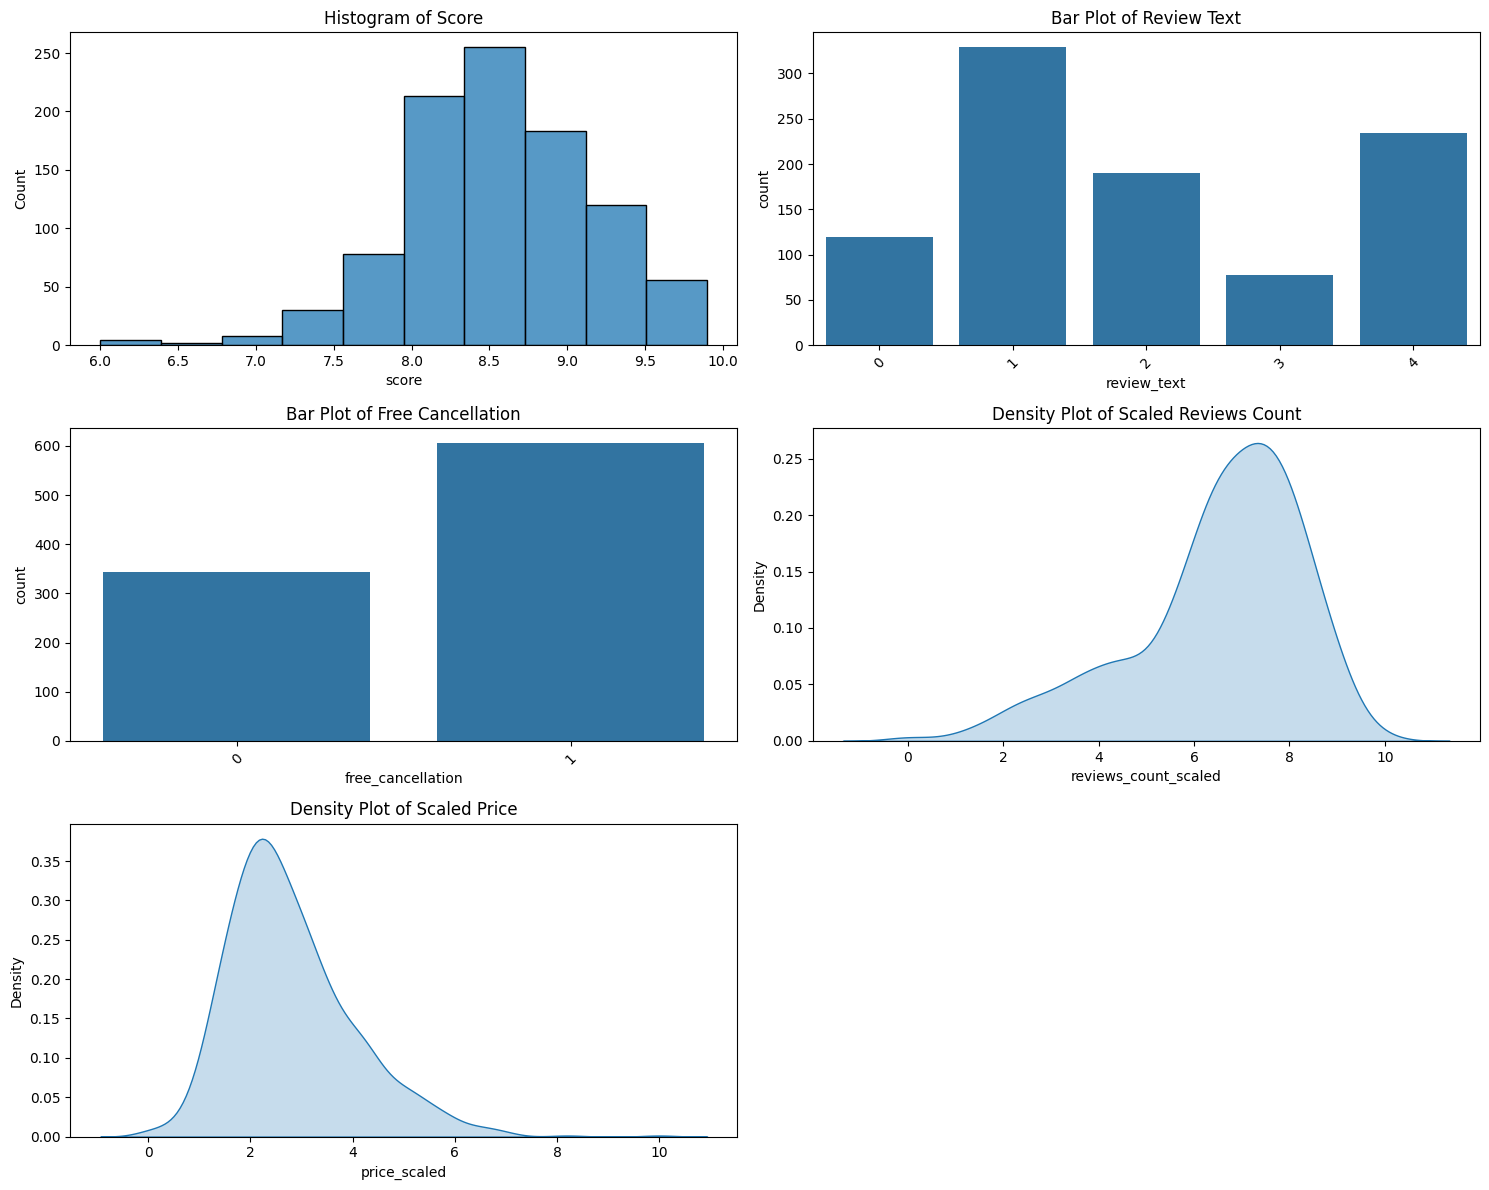

In [155]:
#Normalization of Price and Reviews Count Column

import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Log transformation to handle skewness
df['reviews_count_log'] = np.log1p(df['reviews_count'])
df['price_log'] = np.log1p(df['price'])

# Min-Max Scaling to scale values between 0 and 10
scaler = MinMaxScaler(feature_range=(0, 10))
df[['reviews_count_scaled', 'price_scaled']] = scaler.fit_transform(df[['reviews_count_log', 'price_log']])

# Set the size of the plots
plt.figure(figsize=(15, 12))

# Histogram plot for score column
plt.subplot(3, 2, 1)
sns.histplot(df['score'], bins=10, kde=False)
plt.title('Histogram of Score')

# Bar plot for review_text column
plt.subplot(3, 2, 2)
sns.countplot(data=df, x='review_text')
plt.title('Bar Plot of Review Text')
plt.xticks(rotation=45)

# Bar plot for free_cancellation column
plt.subplot(3, 2, 3)
sns.countplot(data=df, x='free_cancellation')
plt.title('Bar Plot of Free Cancellation')
plt.xticks(rotation=45)

# Density plot for reviews_count_scaled column
plt.subplot(3, 2, 4)
sns.kdeplot(df['reviews_count_scaled'], fill=True)
plt.title('Density Plot of Scaled Reviews Count')

# Density plot for price_scaled column
plt.subplot(3, 2, 5)
sns.kdeplot(df['price_scaled'], fill=True)
plt.title('Density Plot of Scaled Price')

plt.tight_layout()
plt.show()

In [156]:
# Select the final columns we want to keep
final_columns = ['score', 'review_text', 'free_cancellation', 'reviews_count_scaled', 'price_scaled']
final_df = df[final_columns]

# Save the joint dataset
final_df.to_csv('../data/joint_data_collection.csv', index=False)

In [157]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(final_df, test_size=0.2, random_state=42)

# Save training and test datasets
train_df.to_csv('../data/training_data.csv', index=False)
test_df.to_csv('../data/test_data.csv', index=False)

In [158]:
# Create activation_data.csv with one entry from test set
activation_df = test_df.iloc[0:1]
activation_df.to_csv('../data/activation_data.csv', index=False)

In [159]:
# Print the shapes of all datasets to verify
print("Joint dataset shape:", final_df.shape)
print("Training dataset shape:", train_df.shape)
print("Test dataset shape:", test_df.shape)
print("Activation dataset shape:", activation_df.shape)

Joint dataset shape: (949, 5)
Training dataset shape: (759, 5)
Test dataset shape: (190, 5)
Activation dataset shape: (1, 5)
